Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [61]:
data = pd.read_csv('hotel_booking.csv')

Decriptive Analysis

In [3]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
data.shape

(119390, 31)

In [7]:
data.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
days_in_waiting_list                0
customer_type                       0
adr         

In [69]:
# Handling missing values: drop empty values for 'children', 'agent'
data_cleaned = data.drop(columns=['country','children'], axis=1)

In [67]:
# Handling missing values: Fill NaNs with zero or appropriate value for 'children' and 'country'
data['children'].fillna(0)
data['country'].fillna(0)

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object

In [68]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [8]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

Exploratory Data Analysis (EDA)

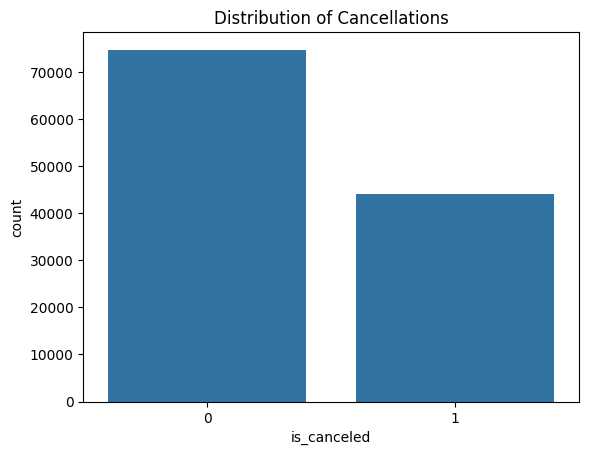

In [12]:
# Plotting the distribution of cancellations
sns.countplot(x='is_canceled', data=data_cleaned)
plt.title('Distribution of Cancellations')
plt.show()

Correlation Matrix

In [47]:
column1 = 'is_canceled'
column2 = 'lead_time'

In [48]:
#calculate the correlation coefficient
data[column1].corr(data[column2])

np.float64(0.2931233557607161)

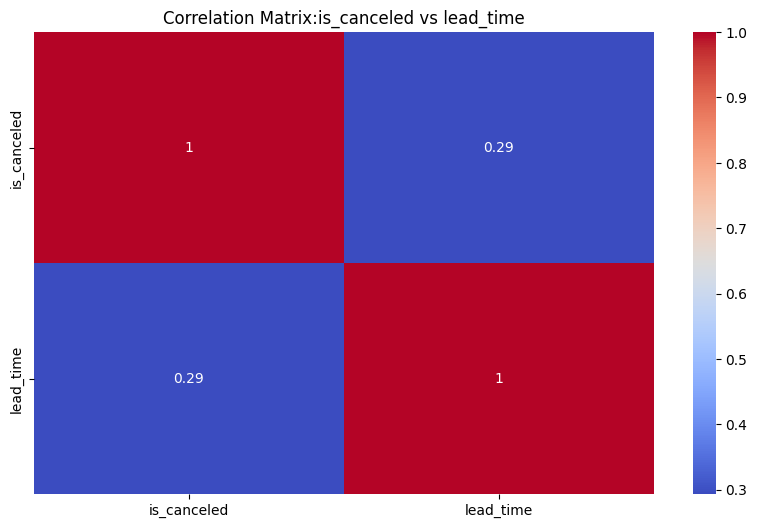

In [49]:
plt.figure(figsize=(10,6))
sns.heatmap(data[[column1, column2]].corr(), annot=True, cmap='coolwarm')
plt.title(f"Correlation Matrix:{column1} vs {column2}")
plt.show()

In [50]:
column1 = 'is_canceled'
column2 = 'agent'

In [51]:
#calculate the correlation coefficient
data[column1].corr(data[column2])

np.float64(-0.04652945245026631)

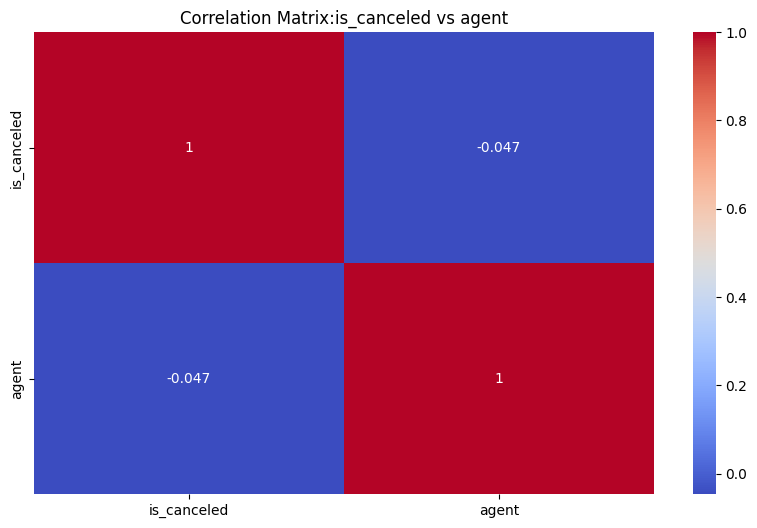

In [52]:
plt.figure(figsize=(10,6))
sns.heatmap(data[[column1, column2]].corr(), annot=True, cmap='coolwarm')
plt.title(f"Correlation Matrix:{column1} vs {column2}")
plt.show()

In [55]:
column1 = 'is_canceled'
column2 = 'is_repeated_guest'

In [56]:
#calculate the correlation coefficient
data[column1].corr(data[column2])

np.float64(-0.0847934183570877)

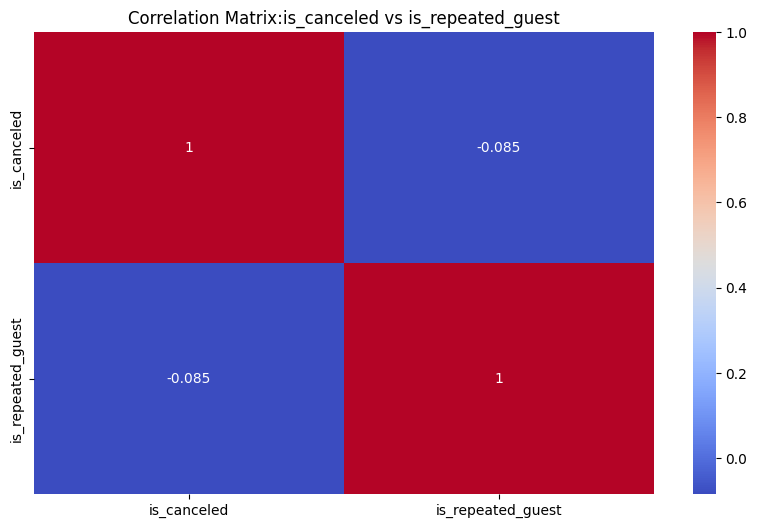

In [57]:
plt.figure(figsize=(10,6))
sns.heatmap(data[[column1, column2]].corr(), annot=True, cmap='coolwarm')
plt.title(f"Correlation Matrix:{column1} vs {column2}")
plt.show()

In [58]:
column1 = 'is_canceled'
column2 = 'booking_changes'

In [59]:
#calculate the correlation coefficient
data[column1].corr(data[column2])

np.float64(-0.144380991061325)

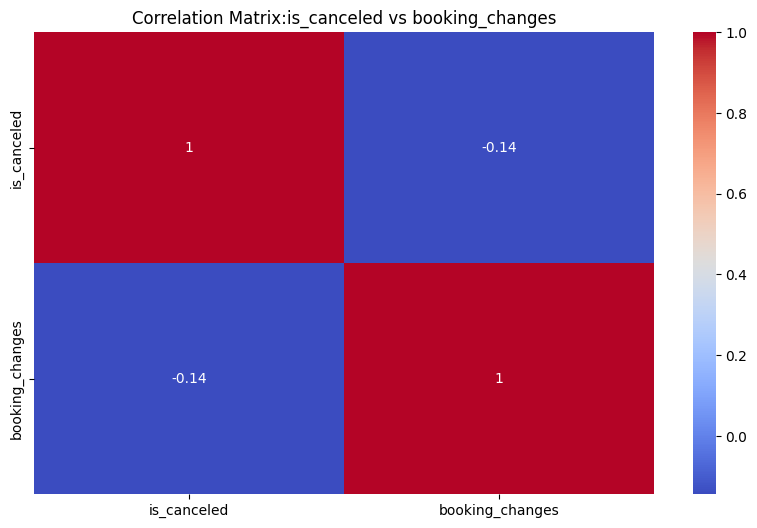

In [60]:
plt.figure(figsize=(10,6))
sns.heatmap(data[[column1, column2]].corr(), annot=True, cmap='coolwarm')
plt.title(f"Correlation Matrix:{column1} vs {column2}")
plt.show()

Outliers

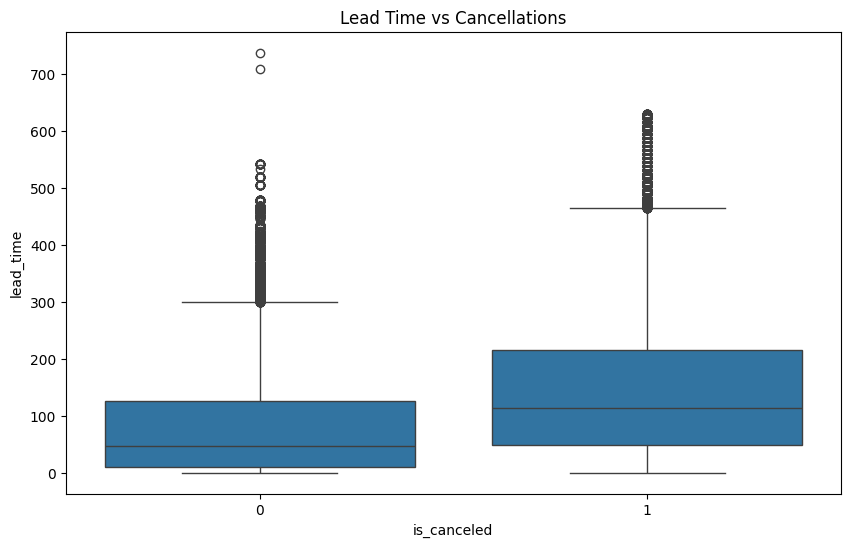

In [13]:
# Check for outliers in 'lead_time' column using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_cleaned, x='is_canceled', y='lead_time')
plt.title('Lead Time vs Cancellations')
plt.show()

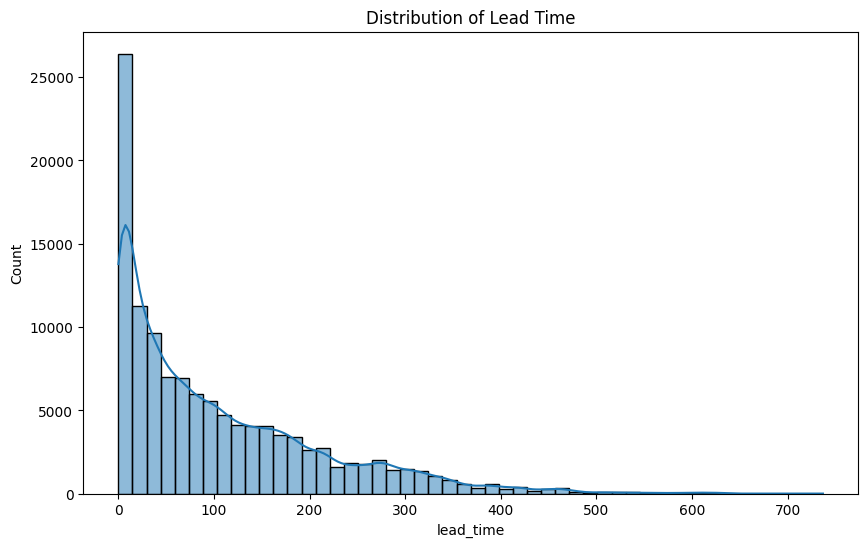

In [14]:
# Distribution of the lead time
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['lead_time'], bins=50, kde=True)
plt.title('Distribution of Lead Time')
plt.show()

Grouping Analysis

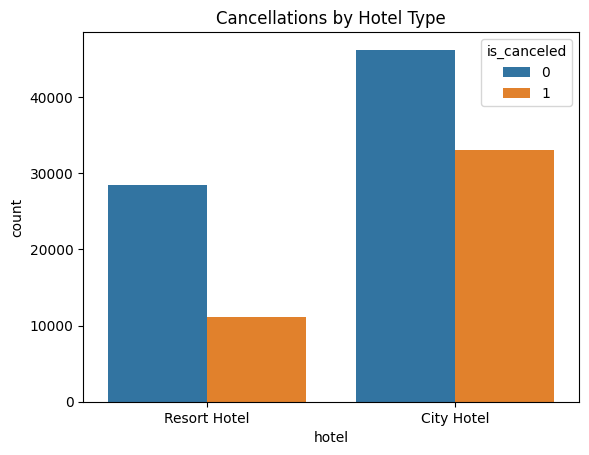

In [15]:
# Grouping cancellations by hotel type
sns.countplot(x='hotel', hue='is_canceled', data=data_cleaned)
plt.title('Cancellations by Hotel Type')
plt.show()

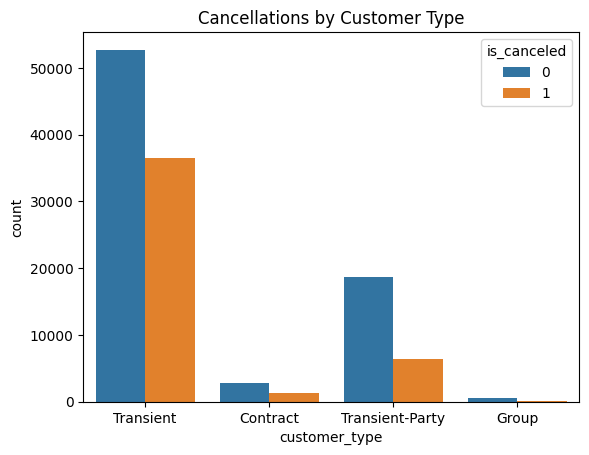

In [16]:
# Grouping cancellations by customer type
sns.countplot(x='customer_type', hue='is_canceled', data=data_cleaned)
plt.title('Cancellations by Customer Type')
plt.show()

Feature Engineering (for prediction)

In [28]:
# Converting categorical variables into dummy variables
data_encoded = pd.get_dummies(data_cleaned, columns=['hotel', 'arrival_date_month', 'meal', 'market_segment',
                                                     'distribution_channel', 'reserved_room_type', 'assigned_room_type',
                                                     'deposit_type', 'customer_type', 'reservation_status'])

In [29]:
# Split dataset into features (X) and target (y)
X = data_encoded.drop(columns=['is_canceled', 'reservation_status_date'])
y = data_encoded['is_canceled']

In [30]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
# Predicting on test data
y_pred = rf_model.predict(X_test)

In [33]:
# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[22478     0]
 [    0 13339]]


In [34]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22478
           1       1.00      1.00      1.00     13339

    accuracy                           1.00     35817
   macro avg       1.00      1.00      1.00     35817
weighted avg       1.00      1.00      1.00     35817



In [35]:
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Accuracy Score: 1.0


In [36]:
# Feature importance
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

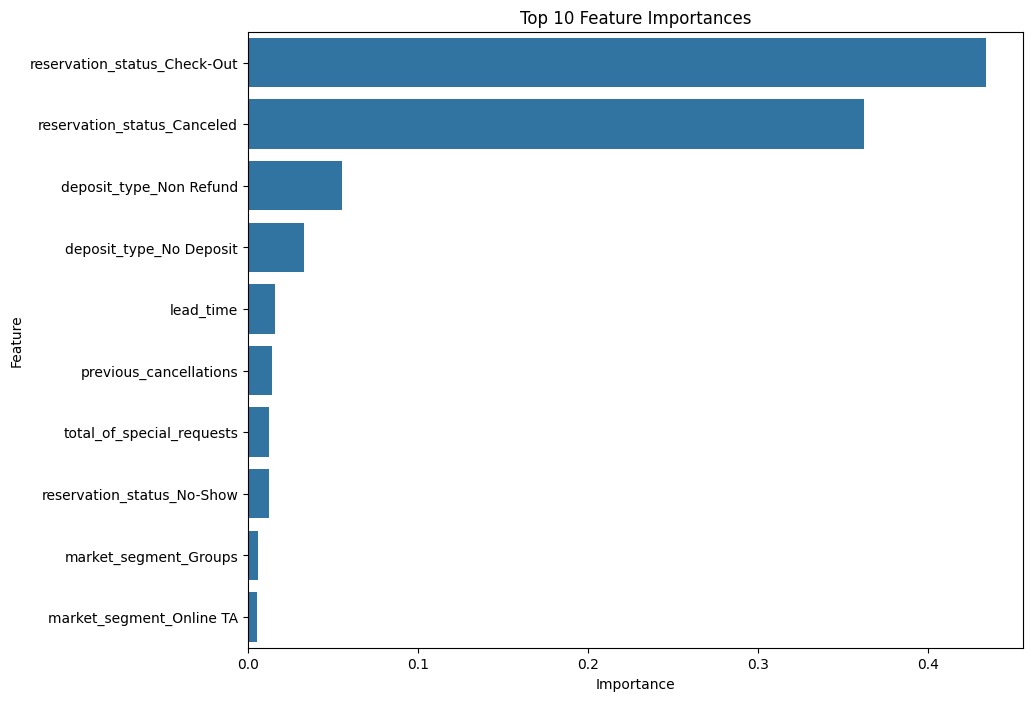

In [37]:
# Plotting feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.show()